# Expectation Maximization (EM)

We have seen how to cluster objects using k-means: start with an initial set of cluster centers,
    find the objects that are close to each center and create a potentially new grouping (clustering)
    and then recompute the centers of the new groups. Continue until convergance.

Every object is assigned to a *single* group. This is called hard assignment.

However, there may be cases were we either cannot use hard assignments or we do not want to do it! For example, if two clusters intersect.

In that case we can use, *soft* assigment (and therefore *soft clustering*). An object can belong to a prticular cluster (group) with a probability (we want the sum of the probabilities to add up to 1). For example, assuming that we have two clusters $C_1$ and $C_2$, we can have that an object $x_1$ belongs to $C_1$ with probability $0.3$ and to $C_2$ with probability $0.7$.

Expectation Maximization (**EM**) can help with that!!

Assume that we have n points $x_1, x_2,\ldots,x_n$ in  a $d$ dimensional space.  Assume that we have k clusters in the data (or we have k different processes-models that generate the data.)


What we want is to compute the final $k$ clusters. 
<br>
However, to do that, it would be great if we can find a way to assign each point to each cluster with some probability (notice that these are hidden values!!! that are very important). We have two sets of uknown parameters: the set of hidden values (probabilities) and the set of cluster parameters (center and variance for example).

**EM** works as follows:

*Initialization*: start with an initial set of cluster  $C_1^1, C_2^1, \ldots, C_k^1$ and inital probability
    that a random point belongs to each cluster $P(C_1), P(C_2), \ldots, P(C_k)$

*Step 1* (Expectation): Compute the probability (weight)  that a given point $x_i$ belongs to cluster $C_j$
    $$ P(C_j|x_i)=\frac{P(x_i|C_j)}{P(x_i)}P(C_j)$$

Also note that:           $P(x_i) = \sum_{j=1}^k P(x_i|C_j)P(C_j)$

This is also  the posterior probability of $C_j$ given $x_i$.

*Step 2 (Maximization)*: Using the weights computed in the previous step, recompute the clusters and cluster probabilities using maximum likelihod (parameters $\theta$)!!.

$$P(C_j) = \frac{1}{n}\sum_{i=1}^n P(C_j|x_i)$$

Now, compute new values for the clusters $C_1, C_2, \ldots, C_n$ using MLE!

Repeat Steps 1 and 2 until stabilization.

If we model each cluster as a multi-dimensional Gaussian, then we can instatiate every part of
the algorithm. This is the GMM (Gaussian Mixture Model) algorithm implemented in *sklearn.mixture* module.

In that case $C_i$ is represented by $(\mu_i, \Sigma_i)$ and
$$ P(x_i|C_j) = \frac{1}{\sqrt{(2\pi)^d |\Sigma_j|}} exp (-\frac{1}{2}(x_i-\mu_j)^T\Sigma_j^{-1}(x_i-\mu_j))$$

In the Step 2, we estimate the parameters of the Gaussian using MLE:
$$\mu_j'=\frac{\sum_{i=1}^n P(C_j|x_i) x_i}{\sum_{i=1}^n P(C_j|x_i)}$$

and

$$\Sigma_j = \frac{\sum_{i=1}^n P(C_j|x_i) (x_i-\mu_j')(x_i-\mu_j')^T}{\sum_{i=1}^n P(C_j|x_i)}$$

Example using **GMM**

0.0213050842285


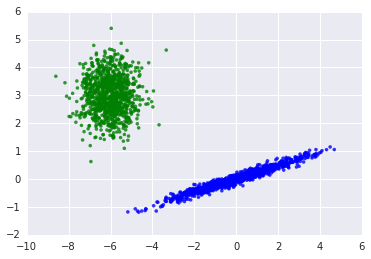

In [21]:
import time
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

import seaborn as sns
%matplotlib inline


# Number of samples per component
n_samples = 1000

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a mixture of Gaussians with EM using two components
gmm = mixture.GMM(n_components=2, covariance_type='diag')

t0 = time.time()

gmm.fit(X)

t1 = time.time()

print t1-t0

y_pred = gmm.predict(X)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10, alpha=0.8)

